<a href="https://colab.research.google.com/github/nitha604/SCT_ML_1/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install and import necessary libraries
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Upload the ZIP file
from google.colab import files
uploaded = files.upload()

# Step 3: Extract the ZIP file
zip_file = next(iter(uploaded))  # Gets the uploaded file name
extract_path = 'house_data'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 4: Load the training dataset
train_path = os.path.join(extract_path, 'train.csv')
train_df = pd.read_csv(train_path)

# Step 5: Select features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'
data = train_df[features + [target]].dropna()

X = data[features]
y = data[target]

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 9: Print the results
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Saving house-prices-advanced-regression-techniques (1).zip to house-prices-advanced-regression-techniques (1).zip
Model Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.74862694461
Mean Squared Error (MSE): 2806426667.247853
R² Score: 0.6341189942328371


   Actual Price  Predicted Price
0        154500    113410.672553
1        325000    305081.877759
2        115000    135904.785630
3        159000    205424.675641
4        315500    227502.683490


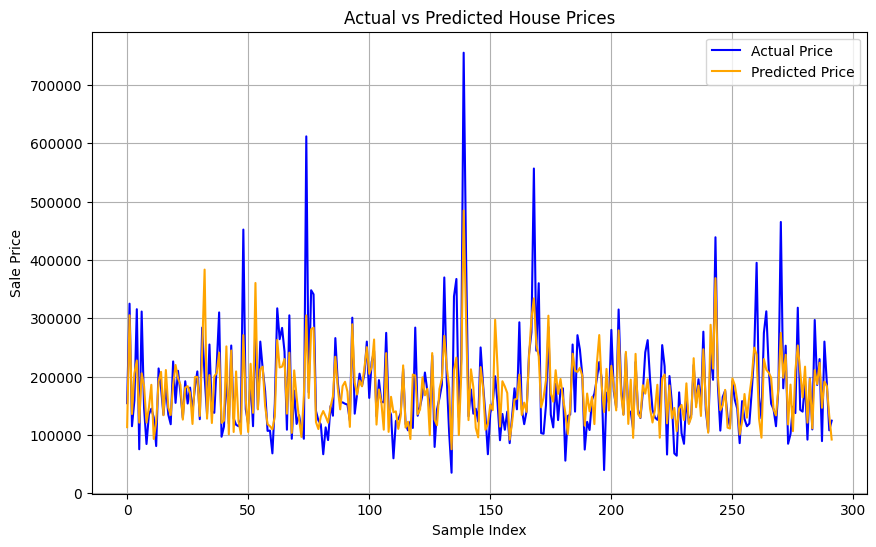

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with actual and predicted prices
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
}).reset_index(drop=True)

# Show first few rows
print(comparison_df.head())

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual Price'], label='Actual Price', color='blue')
plt.plot(comparison_df['Predicted Price'], label='Predicted Price', color='orange')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Sample Index')
plt.ylabel('Sale Price')
plt.legend()
plt.grid(True)
plt.show()

🔍 First 10 Predicted vs Actual House Prices:

   Actual Price  Predicted Price
0        154500    113410.672553
1        325000    305081.877759
2        115000    135904.785630
3        159000    205424.675641
4        315500    227502.683490
5         75500    121157.480796
6        311500    205577.980566
7        146000    183787.203783
8         84500    121157.480796
9        135500    147219.222332


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


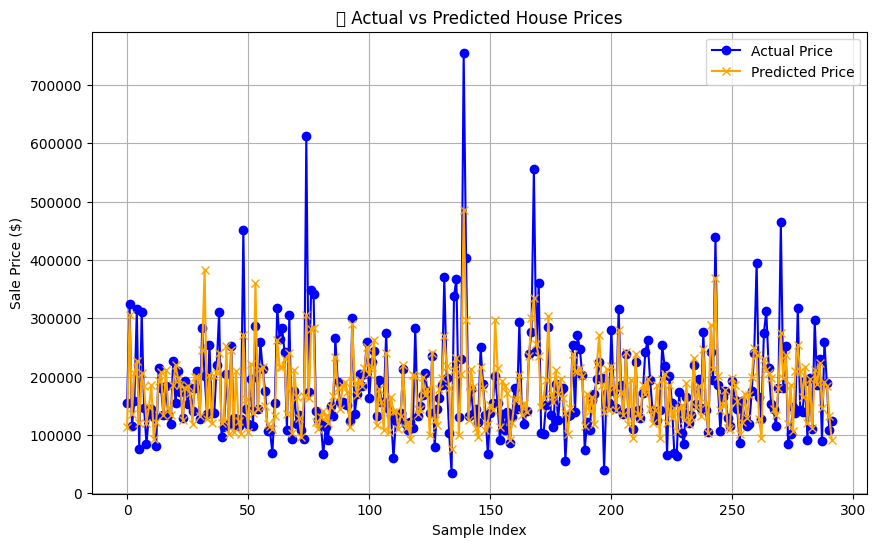

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a DataFrame to compare actual and predicted prices
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
}).reset_index(drop=True)

# Step 2: Display the first 10 rows
print("🔍 First 10 Predicted vs Actual House Prices:\n")
print(comparison_df.head(10))

# Step 3: Plot a comparison chart
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual Price'], label='Actual Price', marker='o', color='blue')
plt.plot(comparison_df['Predicted Price'], label='Predicted Price', marker='x', color='orange')
plt.title('📈 Actual vs Predicted House Prices')
plt.xlabel('Sample Index')
plt.ylabel('Sale Price ($)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-7-1071634966.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


Mean Squared Error (MSE): 2078909945.45
Mean Absolute Error (MAE): 33365.38
R² Score: 0.5501905878900162


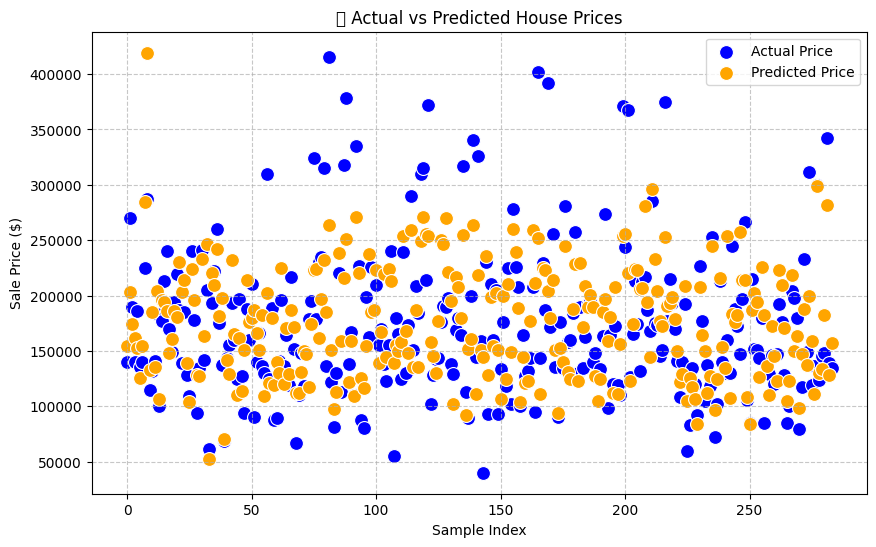

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


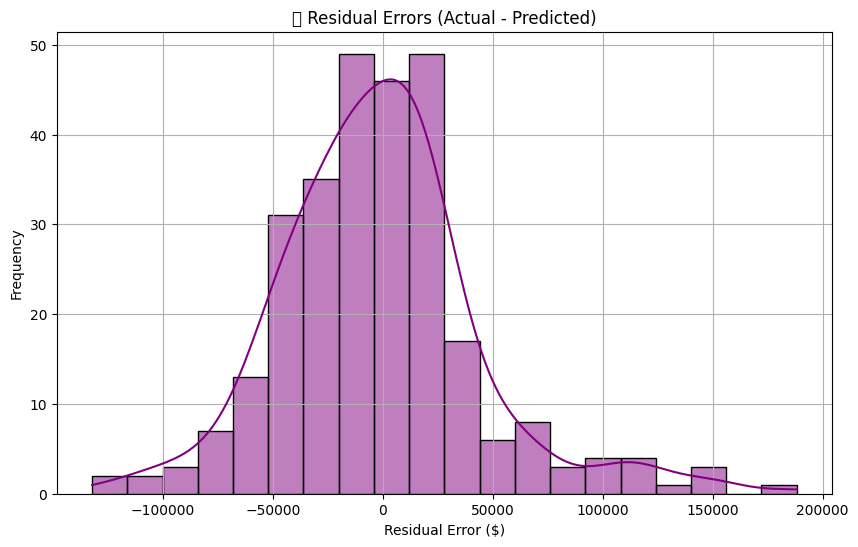

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import os # Import os module

# Load dataset
# Update the file path to reflect the extraction directory
train_path = os.path.join('house_data', 'train.csv')
train_df = pd.read_csv(train_path)

# Select features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'
data = train_df[features + [target]]

# Handle missing values using median imputation
data.fillna(data.median(), inplace=True)

# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(data))
data_clean = data[(z_scores < 3).all(axis=1)]

# Define features and target
X = data_clean[features]
y = data_clean[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement polynomial regression for better feature interaction
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_poly)

# Model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score:", r2)

# Visualization: Actual vs Predicted House Prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred}).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=comparison_df.index, y=comparison_df['Actual Price'], label='Actual Price', color='blue', s=100)
sns.scatterplot(x=comparison_df.index, y=comparison_df['Predicted Price'], label='Predicted Price', color='orange', s=100)
plt.title('📈 Actual vs Predicted House Prices')
plt.xlabel('Sample Index')
plt.ylabel('Sale Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Residual plot (error analysis)
residuals = comparison_df['Actual Price'] - comparison_df['Predicted Price']
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.title("📊 Residual Errors (Actual - Predicted)")
plt.xlabel("Residual Error ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()